In [170]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [171]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


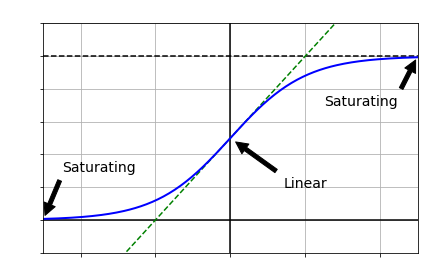

In [172]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14 ,color='w')
plt.yticks(color='w')
plt.xticks(color='w')
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

inputs become large (negative or positive), the function saturates at 0 or 1,

# Xavier and He Initialization
# Glorot and He Initialization

we need the variance of the outputs of each layer to be equal to the variance of its inputs.
<br><br>Equation<br>
1. Normal distribution with mean 0 and variance σ2 = $1/fan_{avg}$
2. uniform distribution between −r and + r, with $r =\sqrt(3/fan_{avg})$
<br><br>
fanavg = (fanin + fanout)/2. 
This initialization strategy is called Xavier initialization or Glorot initialization.
<br><br>
##### LeCun initialization
1. replace fanavg with fanin 
<br><br>
2. for the uniform distribution, just compute r = sqrt 3σ^2


In [173]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

 ##### kernel_initializer="he_uniform" or kernel_initializer="he_normal"

In [174]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

##### He initialization with a uniform distribution but based on fanavg rather than fanin

In [175]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

> # Nonsaturating Activation Functions  
***
1. dying ReLUs
2. stop outputting anything other than 0. especially if you used a large learning rate.  
  
<br>
To solve this problem<br> 

#####  Leaky ReLU
1. small slope ensures that leaky ReLUs never die  
2. setting α = 0.2 (a huge leak) seemed to result in better performance than α = 0.01 (a small leak)

In [176]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


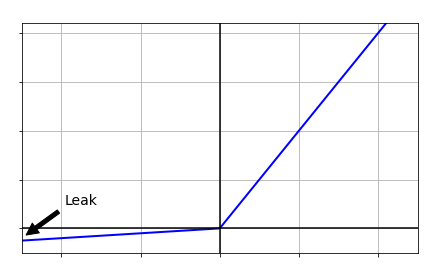

In [177]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14, color='w')
plt.yticks(color='w')
plt.xticks(color='w')
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [178]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [179]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

#####  Randomized leaky ReLU (RReLU)  
***
1. α is picked randomly in a given range during training and is fixed to an average value during testing  
2. reducing the risk of overfitting the training set  

#### parametric leaky ReLU (PReLU)   
***
1. α is authorized to be learned during training  
(instead of being a hyperparameter, it becomes a parameter that can be modified by backpropagation like any other parameter.  
2. strongly outperform ReLU on large image datasets.  
3. smaller datasets it runs the risk of overfitting the training set.

##  Neural network on Fashion MNIST using the Leaky ReLU

In [180]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [181]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [182]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [183]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7902
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200: 0.
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accu

In [184]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [185]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [186]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_266 (Dense)            (None, 300)               235500    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_267 (Dense)            (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_268 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_______________________________________________

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

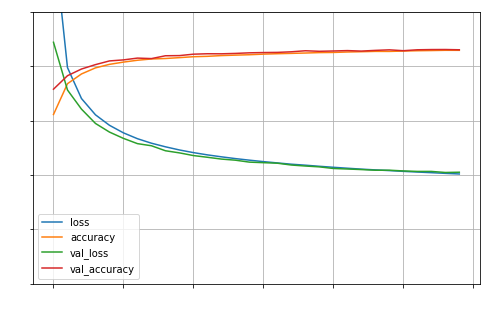

In [187]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.gca().set_ylim(0, 1)
plt.yticks(color='w')
plt.xticks(color='w')

## PReLU  
***
parametric leaky ReLU 

In [188]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [189]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


In [190]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6564 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8050
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

(0.0, 1.0)

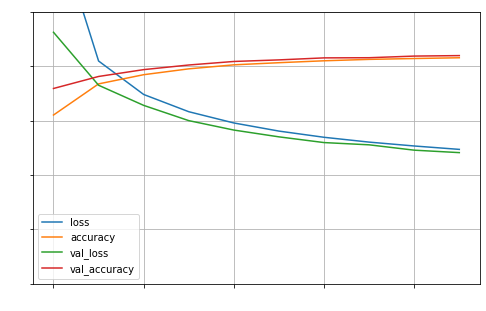

In [191]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.yticks(color='w')
plt.xticks(color='w')
plt.gca().set_ylim(0, 1)

#### exponential linear unit (ELU)  
***
1. outperformed all the ReLU variants.  
2. training time was reduced  
3. the neural network performed better on the test set.  
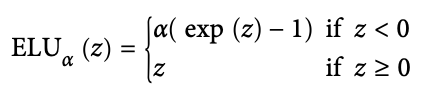  

<br><br>


In [192]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


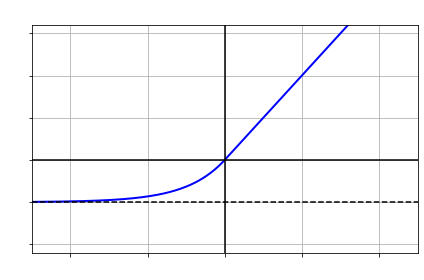

In [193]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.yticks(color='w')
plt.xticks(color='w')
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14, color='w')
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [194]:
keras.layers.Dense(10, activation="elu")

1. negative values when z < 0  
helps alleviate the vanishing gradients problem  
2. It has a nonzero gradient for z < 0,  
which avoids the dead neurons problem.  
3. If α is equal to 1  
then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent.  
#### drawback of the ELU activation function.  
1. slower to compute  
#### Scaled ELU (SELU)  
***
 if you build a neural network composed exclusively of a stack of dense layers,  
 and if all hidden layers use the SELU activation function,  
 then the network will self-normalize:  
 the output of each layer will tend to preserve a mean of 0 and standard deviation of 1 during training, which solves the vanishing/exploding gradients problem.  
  #### few conditions for self-normalization to happen
 1. input features must be standardized (mean 0 and standard deviation 1).  
 2. Every hidden layer’s weights must be initialized with LeCun normal initialization.  
 kernel_initializer="lecun_normal"  
 
 3. network’s architecture must be sequential.  
 (SELU in nonsequential architectures, such as recurrent networks, self-normalization will not be guaranteed.)  
 4. only guarantees self-normalization if all layers are dense.  
  SELU activation function can improve performance in convolutional neural nets as well (see Chapter 14).
 #### which activation function should you use for the hidden layers of your deep neural networks?
 1.in general SELU > ELU > leaky ReLU (and its variants) > ReLU > tanh > logistic.  
 2.If the network’s architecture prevents it from self normalizing, then **ELU** may perform better than ____SELU____ (since SELU is not smooth at z = 0)  
  3.If you care a lot about runtime latency  prefer **leaky ReLU**.  
  4.If you have spare time and computing power, you can use cross-validation to evaluate other activation functions, such as RReLU if your network is overfitting or PReLU if you have a huge training set.  
  5.speed is your priority, __ReLU__ might still be the best choice

# SELU  
***
https://arxiv.org/pdf/1706.02515.pdf   
***
This activation function was proposed in this great paper by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of **dense layers** using the SELU activation function and **LeCun initialization** will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out.  
Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ1 or ℓ2 regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [195]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [196]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


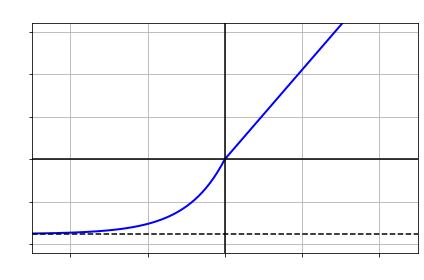

In [197]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.yticks(color='w')
plt.xticks(color='w')
plt.title("SELU activation function", fontsize=14, color='w')
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

By default, the SELU hyperparameters (scale and alpha) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [198]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [199]:
# Using SELU is easy:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

Let's create a neural net for Fashion MNIST with **100 hidden layers**, 
#### using the **SELU** activation function:

In [200]:
np.random.seed(42)
tf.random.set_seed(42)

In [201]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [202]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [203]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [204]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 25s 15ms/step - loss: 1.2581 - accuracy: 0.5229 - val_loss: 0.7894 - val_accuracy: 0.7192
Epoch 2/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.8031 - accuracy: 0.7088 - val_loss: 0.6420 - val_accuracy: 0.7772
Epoch 3/5
1719/1719 [==============================] - 25s 15ms/step - loss: 0.6111 - accuracy: 0.7832 - val_loss: 0.5722 - val_accuracy: 0.7944
Epoch 4/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5472 - accuracy: 0.8065 - val_loss: 0.5490 - val_accuracy: 0.8116
Epoch 5/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5064 - accuracy: 0.8235 - val_loss: 0.5135 - val_accuracy: 0.8228


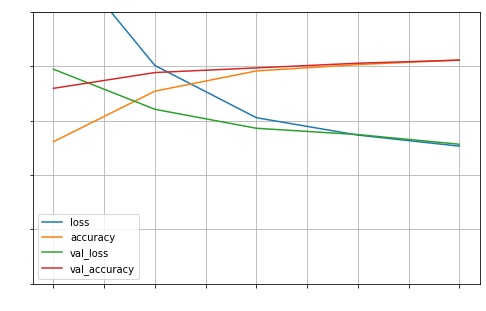

In [205]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) #그리드 보여준다 가로세로 줄
plt.gca().set_ylim(0, 1) # y축 0~1
plt.yticks(color='w')
plt.xticks(color='w')
# save_fig("keras_learning_curves_plot")
plt.show()

Now look at what happens if we try to use the 
#### **ReLU** activation function instead:

In [206]:
np.random.seed(42)
tf.random.set_seed(42)

In [207]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [208]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [209]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 19s 11ms/step - loss: 1.7682 - accuracy: 0.2741 - val_loss: 1.3060 - val_accuracy: 0.3864
Epoch 2/5
1719/1719 [==============================] - 18s 11ms/step - loss: 1.2256 - accuracy: 0.4781 - val_loss: 1.1808 - val_accuracy: 0.4822
Epoch 3/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.9104 - accuracy: 0.6321 - val_loss: 0.8720 - val_accuracy: 0.6402
Epoch 4/5
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7976 - accuracy: 0.6908 - val_loss: 0.7200 - val_accuracy: 0.7324
Epoch 5/5
1719/1719 [==============================] - 18s 11ms/step - loss: 0.7394 - accuracy: 0.7217 - val_loss: 0.7023 - val_accuracy: 0.7286


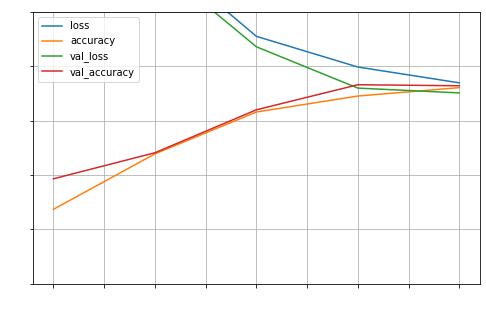

In [210]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) #그리드 보여준다 가로세로 줄
plt.gca().set_ylim(0, 1) # y축 0~1
plt.yticks(color='w')
plt.xticks(color='w')
# save_fig("keras_learning_curves_plot")
plt.show()

> # Batch Normalization   
***
adding an operation in the model just before or after the activation function of each hidden layer.  
zero-centers and normalizes each input  
scales and shifts the result using two new parameter vectors per layer:  
(1. scaling, 2. shifting)  
<br><br>
if you add a BN layer as the very first layer of your neural network, you do not need to standardize your training set (e.g., using a StandardScaler), BN layer will do it for you.  
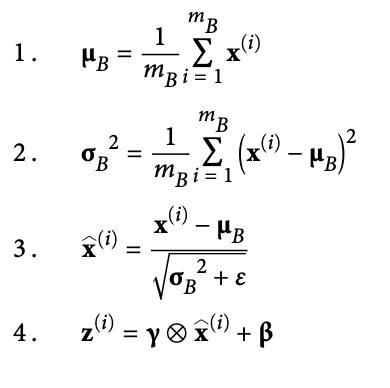  
$\hat{x}^{(i)}$is the vector of zero-centered and normalized inputs for instance i.
$m_{B}$is the number of instances in the mini-batch  
γ is the output scale parameter vector for the layer.  
ε is a tiny number that avoids division by zero (typically 10–5). This is called a smoothing term.  
${z}^{(i)}$ is the output of the BN operation. It is a rescaled and shifted version of the inputs.  
⊗ represents element-wise multiplication (each input is multiplied by its corresponding output scale parameter).
<br>
during training, BN standardizes its inputs, then rescales and offsets them.  
####  test time?  
computing statistics over the batch instances would be unreliable  
#### BatchNormalization  
four parameter vectors are learned in each batch-normalized layer  
1. γ (the output scale vector) β (the output offset vector) are learned through regular backpropagation 
2. μ (the final input mean vector) and σ (the final input standard deviation vector) are estimated using an exponential moving average.  
μ and σ are estimated during training, but they are used only after training (to replace the batch input means and standard deviations.  
<br>  
<br>  
#### Ioffe and Szegedy  
1.vanishing gradients problem was strongly reduced. could use tanh and even the logistic activation function.  
2.able to use much larger learning rates, significantly speeding up the learning process.  
3.Batch Normalization acts like a regularizer, reducing the need for other regularization techniques (such as dropout, described later in this chapter).  
#### disadvantage. 
1.however, add some complexity to the model  
2.there is a runtime penalty: the neural network makes slower predictions due to the extra computations required at each layer.  
(fuse the BN layer with the previous layer, after training, thereby avoiding the runtime penalty.)   



## Implementing Batch Normalization with Keras  
***
but for deeper networks it can make a tremendous difference.  
<br>
The authors of the BN paper argued in favor of adding the BN layers before the activation functions, rather than after (as we just did).  
(preferable seems to depend on the task)

In [211]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [212]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_476 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_477 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_478 (Dense)            (None, 10)              

BN layer adds four parameters per input: γ, β, μ, and σ  
(μ and σ, are the moving averages; are not affected by backpropagation, so Keras calls them "non-trainable")  
<font color=green>**“non-trainable” really means “untouched by backpropagation.”**</font>  
784 x 4 = 3136  
<br><br>
total number of BN parameters, 3,136 + 1,200 + 400, and divide by 2, you get 2,368, which is the total number of non-trainable parameters in this model

##### Let’s look at the parameters of the first BN layer. Two are trainable (by backpropagation), and two are not

In [213]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

#### These operations will update the moving averages.

In [214]:
bn1.updates

[<tf.Operation 'cond_2/Identity' type=Identity>,
 <tf.Operation 'cond_3/Identity' type=Identity>]

In [215]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [216]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8750 - accuracy: 0.7122 - val_loss: 0.5524 - val_accuracy: 0.8226
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5753 - accuracy: 0.8032 - val_loss: 0.4725 - val_accuracy: 0.8468
Epoch 3/10
1719/1719 [==============================] - 508s 295ms/step - loss: 0.5189 - accuracy: 0.8206 - val_loss: 0.4375 - val_accuracy: 0.8548
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4152 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4565 - accuracy: 0.8408 - val_loss: 0.3997 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4398 - accuracy: 0.8474 - val_loss: 0.3866 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4242 - accuracy: 0.8514 - val_loss: 0.3762 - val_accu

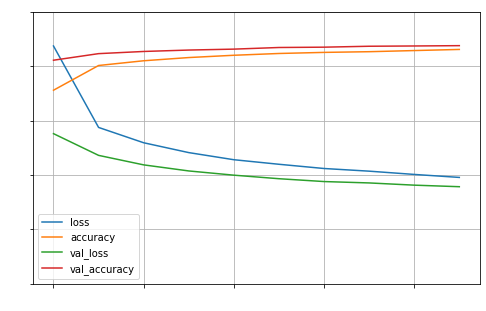

In [217]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) #그리드 보여준다 가로세로 줄
plt.gca().set_ylim(0, 1) # y축 0~1
plt.yticks(color='w')
plt.xticks(color='w')
# save_fig("keras_learning_curves_plot")
plt.show()

#### To add the BN layers before the activation functions, you must remove the activation function from the hidden layers and add them as separate layers after the BN layers.  
Since a Batch Normalization layer includes one offset parameter per input, you can remove the bias term from the previous layer  
(just pass **[use_bias=False]** when creating it)

In [218]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.BatchNormalization(),            -> keras.layers.BatchNormalization()
#     keras.layers.Dense(300, activation="relu"),   -> keras.layers.Dense(300, use_bias=False),
#     keras.layers.BatchNormalization(),            -> keras.layers.BatchNormalization(),
#                                                   -> keras.layers.Activation("relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(10, activation="softmax")
# ])

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [219]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [220]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5447 - accuracy: 0.8192 - val_loss: 0.4666 - val_accuracy: 0.8450
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5109 - accuracy: 0.8280 - val_loss: 0.4433 - val_accuracy: 0.8534
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8338 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_accuracy:

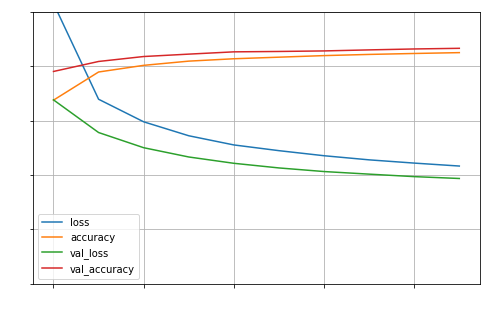

In [221]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) #그리드 보여준다 가로세로 줄
plt.gca().set_ylim(0, 1) # y축 0~1
plt.yticks(color='w')
plt.xticks(color='w')
# save_fig("keras_learning_curves_plot")
plt.show()

In [222]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_479 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_480 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)             

#### BatchNormalization class has quite a few hyperparameters you can tweak
1. ccasionally need to tweak the momentum.  
A good momentum value is typically close to 1; for example, 0.9, 0.99, or 0.999.  
2. Another important hyperparameter is axis:  
determines which axis should be normalized.
<br><br>
a recent paper11 by Hongyi Zhang et al. may change this assumption: by using a novel fixed update (fixup) weight initialization technique. Managed to train a very deep neural network (10,000 layers!) without BN!    
***
https://arxiv.org/abs/1901.09321    
***



In [223]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),

#     keras.layers.BatchNormalization(),    
# will independently normalize (and rescale and shift) each of the 784 input features
#     keras.layers.Dense(300, use_bias=False),
#     keras.layers.BatchNormalization(),
#     keras.layers.Activation("relu"),
#     keras.layers.Dense(100, use_bias=False),
#     keras.layers.BatchNormalization(),
#     keras.layers.Activation("relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

# Gradient Clipping   
***
to mitigate the exploding gradients problem is to clip the gradients during backpropagation so that they never exceed some threshold.  

https://arxiv.org/abs/1211.5063    
***
Used in RNNs as Batch Normalization is tricky to use in RNNs
  
All Keras optimizers accept clipnorm or clipvalue arguments:  
optimizer will clip every component of the gradient vector to a value between –1.0 and 1.0

In [224]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
# model.compile(loss="mse", optimizer=optimizer)

In [225]:
#  If you want to ensure that Gradient Clipping does not change the direction of the gradient 
#  vector.should clip by norm by setting clipnorm instead of clipvalue  
#  This will clip the whole gradient if its l2 norm is greater than the threshold you picked
optimizer = keras.optimizers.SGD(clipnorm=1.0)

> # Reusing Pretrained Layers  
***
It is generally not a good idea to train a very large DNN from scratch.  
reuse the lower layers of this network. This technique is called <font color=green>transfer learning</font>.  
1. speed up training considerably  
2. also require significantly less training data.  
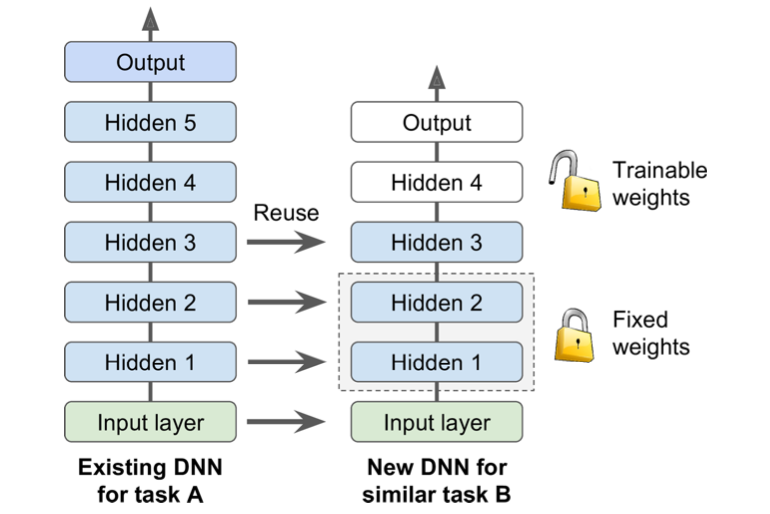  
The more similar the tasks are, the more layers you want to reuse (starting with the lower layers).


#### Let's split the fashion MNIST training set in two:    
***
<br> 
X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).  
X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.  
The validation set and the test set are also split this way, but without restricting the number of images.  
<br>
We will train a model on set A (classification task with 8 classes),  
and try to reuse it to tackle set B (binary classification).  
We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts).  
However, since we are using Dense layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).


In [226]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
# training set of just the first 200 images of sandals or shirts.
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [227]:
X_train_A.shape

(43986, 28, 28)

In [228]:
X_train_B.shape

(200, 28, 28)

In [229]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [230]:
y_train_B[:30]
# 6 shirts -> 1

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [231]:
tf.random.set_seed(42)
np.random.seed(42)

In [232]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [233]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [234]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.9011
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2775 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2730 - accuracy: 0.9060 - val_loss: 0.2736 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2718 - val_accuracy:

In [235]:
model_A.save("my_model_A.h5")

In [236]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [237]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [238]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 30ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [239]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_479 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_480 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)             

In [240]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [241]:
model_A_clone = keras.models.clone_model(model_A) 
# need to clone model_A before you reuse its layers. (does not clone the weights)

model_A_clone.set_weights(model_A.get_weights())

In [242]:
# since the new output layer was ini‐ tialized randomly it will make large errors 
# will be large error gradients that may wreck the reused weights.
# To avoid this, one approach is to freeze the reused layers during the first few epochs

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [243]:
# Now you can train the model for a few epochs, then unfreeze the reused layers
# usually a good idea to reduce the learning rate, to avoid damaging the reused weights:

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3), # the default lr is 1e-2
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 28ms/step - loss: 0.5767 - accuracy: 0.6550 - val_loss: 0.5816 - val_accuracy: 0.6400
Epoch 2/4
7/7 [==============================] - 0s 14ms/step - loss: 0.5404 - accuracy: 0.6800 - val_loss: 0.5443 - val_accuracy: 0.6826
Epoch 3/4
7/7 [==============================] - 0s 14ms/step - loss: 0.5038 - accuracy: 0.7300 - val_loss: 0.5124 - val_accuracy: 0.7110
Epoch 4/4
7/7 [==============================] - 0s 14ms/step - loss: 0.4725 - accuracy: 0.7450 - val_loss: 0.4839 - val_accuracy: 0.7353
Epoch 1/16
7/7 [==============================] - 0s 28ms/step - loss: 0.3948 - accuracy: 0.8150 - val_loss: 0.3455 - val_accuracy: 0.8661
Epoch 2/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2792 - accuracy: 0.9350 - val_loss: 0.2602 - val_accuracy: 0.9300
Epoch 3/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2081 - accuracy: 0.9650 - val_loss: 0.2111 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

In [244]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [245]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9935


[0.06834527105093002, 0.9934999942779541]

In [246]:
(100 - 97.04) / (100 - 99.35)
# got quite a bit of transfer: the error rate dropped by a factor of 4!
# tried many configurations until eE found one that demonstrated a strong improvement 
# when a paper just looks too positive, you should be suspicious.
# tried many variants and reported only the best results 

4.553846153846105

It turns out that transfer learning does not work very well with small dense networks,   
dense networks learn very specific patterns  
which are unlikely to be useful in other tasks  
Transfer learning works best with deep convolutional neural networks, which tend to learn feature detectors that are much more general.  
revisit transfer learning in <font color=green>Chapter 14</font>.

# Unsupervised Pretraining  
***
you don’t have much labeled training data  
First, you should try to gather more labeled training data.  
perform **<font color=green>unsupervised pretraining</font>**  
(autoencoder or a generative adversarial network (see <font color=green>Chapter 17</font>)  
<br>
reuse the lower layers of the autoencoder or the lower layers of the GAN’s discriminator, add the output layer for your task on top, and finetune the final network using supervised learning (i.e., with the labeled training examples).  
Unsupervised pretraining (today typically using autoencoders or GANs rather than RBMs)  
<br> 
 <font color=green>greedy layer-wise pretraining</font>  
 first train an unsupervised model with a single layer, typically an RBM.  
 would freeze that layer and add another one on top of it.  
 then train the model again (effectively just training the new layer.  
 freeze the new layer and add another layer on top of it.  
 train the model again, and so on.  
 <br>
  Nowadays, things are much simpler, use autoencoders or GANs rather than RBMs.
 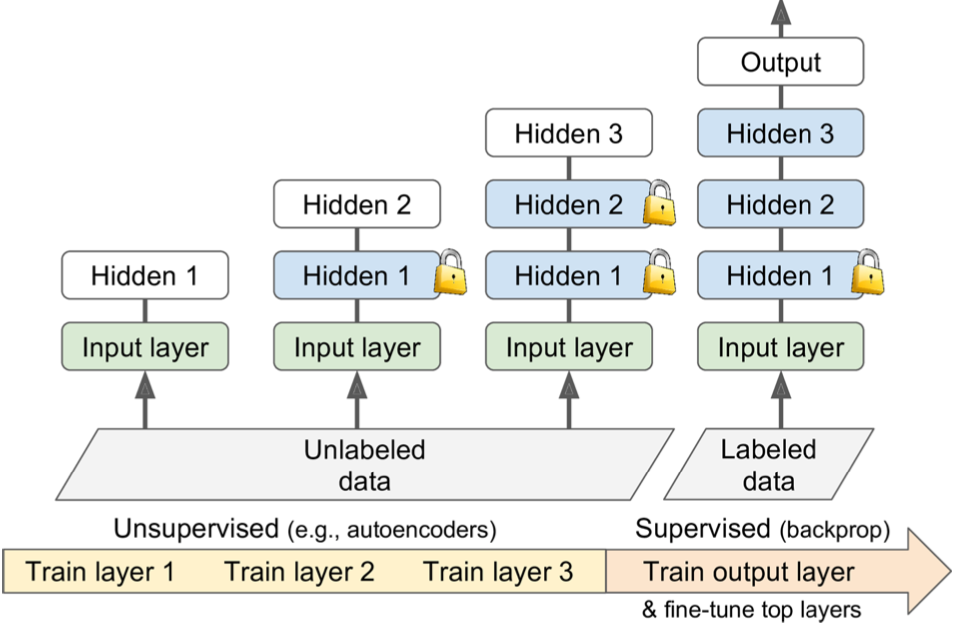  
In unsupervised training, a model is trained on the unlabeled data (or on all the data) using an unsupervised learning technique,   
then it is fine-tuned for the final task on the labeled data using a supervised learning technique;   
the unsupervised part may train one layer at a time as shown here, or it may train the full model directly
 <br><br>  
<font color=green>natural language processing (NLP)</font>    applications, you can download a corpus of millions of text documents and automatically generate labeled data from it. For exam‐ ple, you could randomly mask out some words and train a model to predict what the missing words are

> # Faster Optimizers  
***
Training a very large deep neural network can be painfully slow. 
1. applying a good initialization strategy for the connection weights.  
2. using a good activation function. 
3. using Batch Normalization.   
4. reusing parts of a pretrained network(possibly built on an auxiliary task or using unsupervised learning).

<br>
Another huge speed boost comes from using a faster optimizer than the regular Gradient Descent optimizer.  
<font color=yellow>Nesterov Accelerated Gradient, AdaGrad, RMSProp, Adam and Nadam optimization.</font>

### Momentum optimization  
***
Imagine a bowling ball rolling down a gentle slope on a smooth surface: it will start out slowly, but it will quickly pick up momentum.    
1964년.
https://www.researchgate.net/publication/243648538_Some_methods_of_speeding_up_the_convergence_of_iteration_methods  
***
<br>  
regular Gradient Descent will simply take small, regular steps down the slope, so the algo‐ rithm will take much more time to reach the bottom.  
$ θ ← θ – η∇_{θ}J(θ)$  
Gradient Descent updates the weights θ by directly subtracting the gradient of the cost function J(θ) with regard to the weights (∇θJ(θ)) multiplied by the learning rate η.  
<br>  
Momentum optimization cares a great deal about what previous gradients were.  
1. $ m ← βm−η∇_{θ}J(θ) $  
2. $ θ ← θ+m $  
 - subtracts the local gradient from the momentum vector m (multi‐ plied by the learning  - rate η).  
 - updates the weights by adding this momentum vector.  
 - Gradient is used for acceleration, not for speed.  
 - algorithm introduces a new <font color=green>hyperparameter β.</font>, called the momentum.  
(must be set between 0 (high friction) and 1 (no friction))  

<br>  
 - Allows momentum optimization to escape from plateaus much faster than GD.seen in <font color=green>Chapter 4.</font>  
<br>
 - Is equal to that gradient multiplied by the learning rate η multiplied by 1/(1–β) (ignoring the sign). For example, if β = 0.9, then the terminal velocity is equal to 10 times the gradient times the learning rate.  
<br>
 - cost function will look like an elongated bowl .
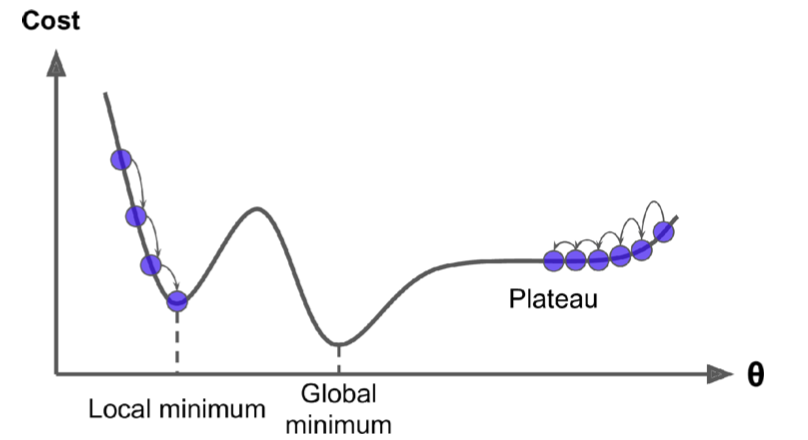  
<br>
 - Due to the momentum, the optimizer may overshoot a bit, then come back, overshoot again, and oscillate like this many times before stabilizing at the minimum.  
<br>
 - <font color=green>One drawback</font> of momentum optimization is that it adds yet another hyperparameter to tune. However,  
 - the momentum value of 0.9 usually works well in practice and almost always goes faster than regular Gradient Descent.

In [247]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient 
***  
   1983년도  
***
almost always faster than vanilla momentum optimization.  
1. $m ← βm−η∇_{θ}J(θ+βm)$  
2. $θ ← θ+m$  
small tweak works because in general the momentum vector will be pointing in the right direction.  
(i.e., toward the optimum)
<br>  
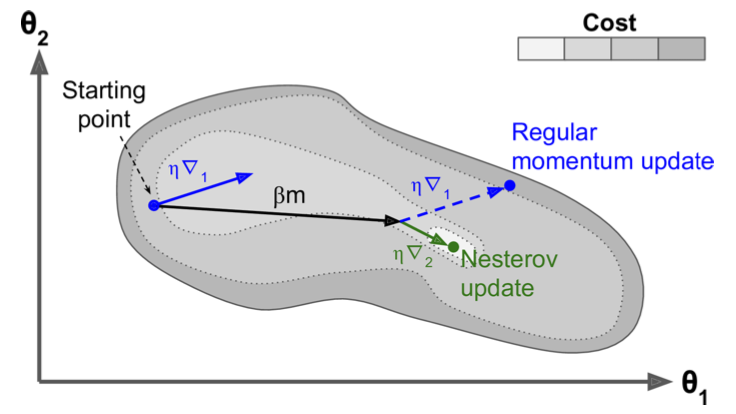  

 - Regular versus Nesterov momentum optimization.
 - $∇_{1}$ represents the gradient of the cost function measured at the starting point θ, and $∇_{2}$ represents the gradient at the point located at θ + βm



In [248]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad  
***  
2011
http://jmlr.org/papers/v12/duchi11a  
***

Consider the elongated bowl problem again.  
1. Gradient Descent starts by quickly going down the steepest slope.  
2. does not point straight toward the global optimum.  
3. then it very slowly goes down to the bottom of the valley.

$ s ← s+∇_{θ}J(θ)⊗∇_{θ}J(θ) $  
$ θ ← θ−η∇_{θ}J(θ)⊘ \sqrt{s+ε} $  
 - first step accumulates the square of the gradients into the vector s  
 - This vectorized form is equivalent to computing $ s_{i} ← s_{i} + (∂ J(θ) / ∂ θ_{i})^2 $ for each element si of the vector s.  
 $s_{i}$ accumulates the squares of the partial derivative of the cost function with regard to parameter θi.  
 if the cost function is steep along the $i^{th}$ dimension, then $s_{i}$ will get larger and larger at each iteration.  
 - second step is almost identical to Gradient Descent, but with one big difference: the gradient vector is scaled down by a factor of $\sqrt{s + ε}$  (⊘ symbol represents element-wise division)  
 - ε is a smoothing term to avoid division by zero, typically set to $10^{–10}$).  
 - $θ_{i} ← θ_{i} − η∂J(θ) / ∂θ_{i}/ \sqrt{s_{i} + ε}$ for all parameters $ θ_{i}$  
<br>

In short, this algorithm decays the learning rate.  
it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an <font color=green>adaptive learning rate.</font>  
One additional benefit is that it requires much less tuning of the learn‐ ing rate hyperparameter η.  
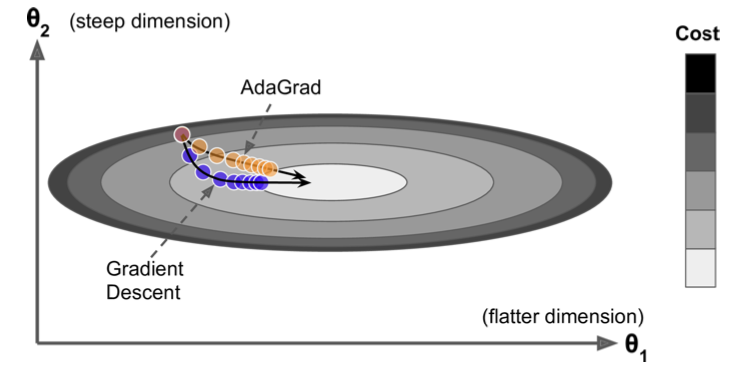  
AdaGrad versus Gradient Descent.



<font color=green>drawback</font>  
 - AdaGrad frequently performs well for simple quadratic problems, but it often stops too early when training NN.  
 - learning rate gets scaled down so much that the algorithm ends up stopping entirely before reaching the global optimum.  
 - you should not use it to train deep neural networks (it may be efficient for simpler tasks such as Linear Regression, though)

In [249]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### RMSProp  
***
no artical.2012  
https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf  
slide 29 lecture6
https://www.youtube.com/watch?v=defQQqkXEfE&list=PLoRl3Ht4JOcdU872GhiYWf6jwrk_SNhz9&index=29  
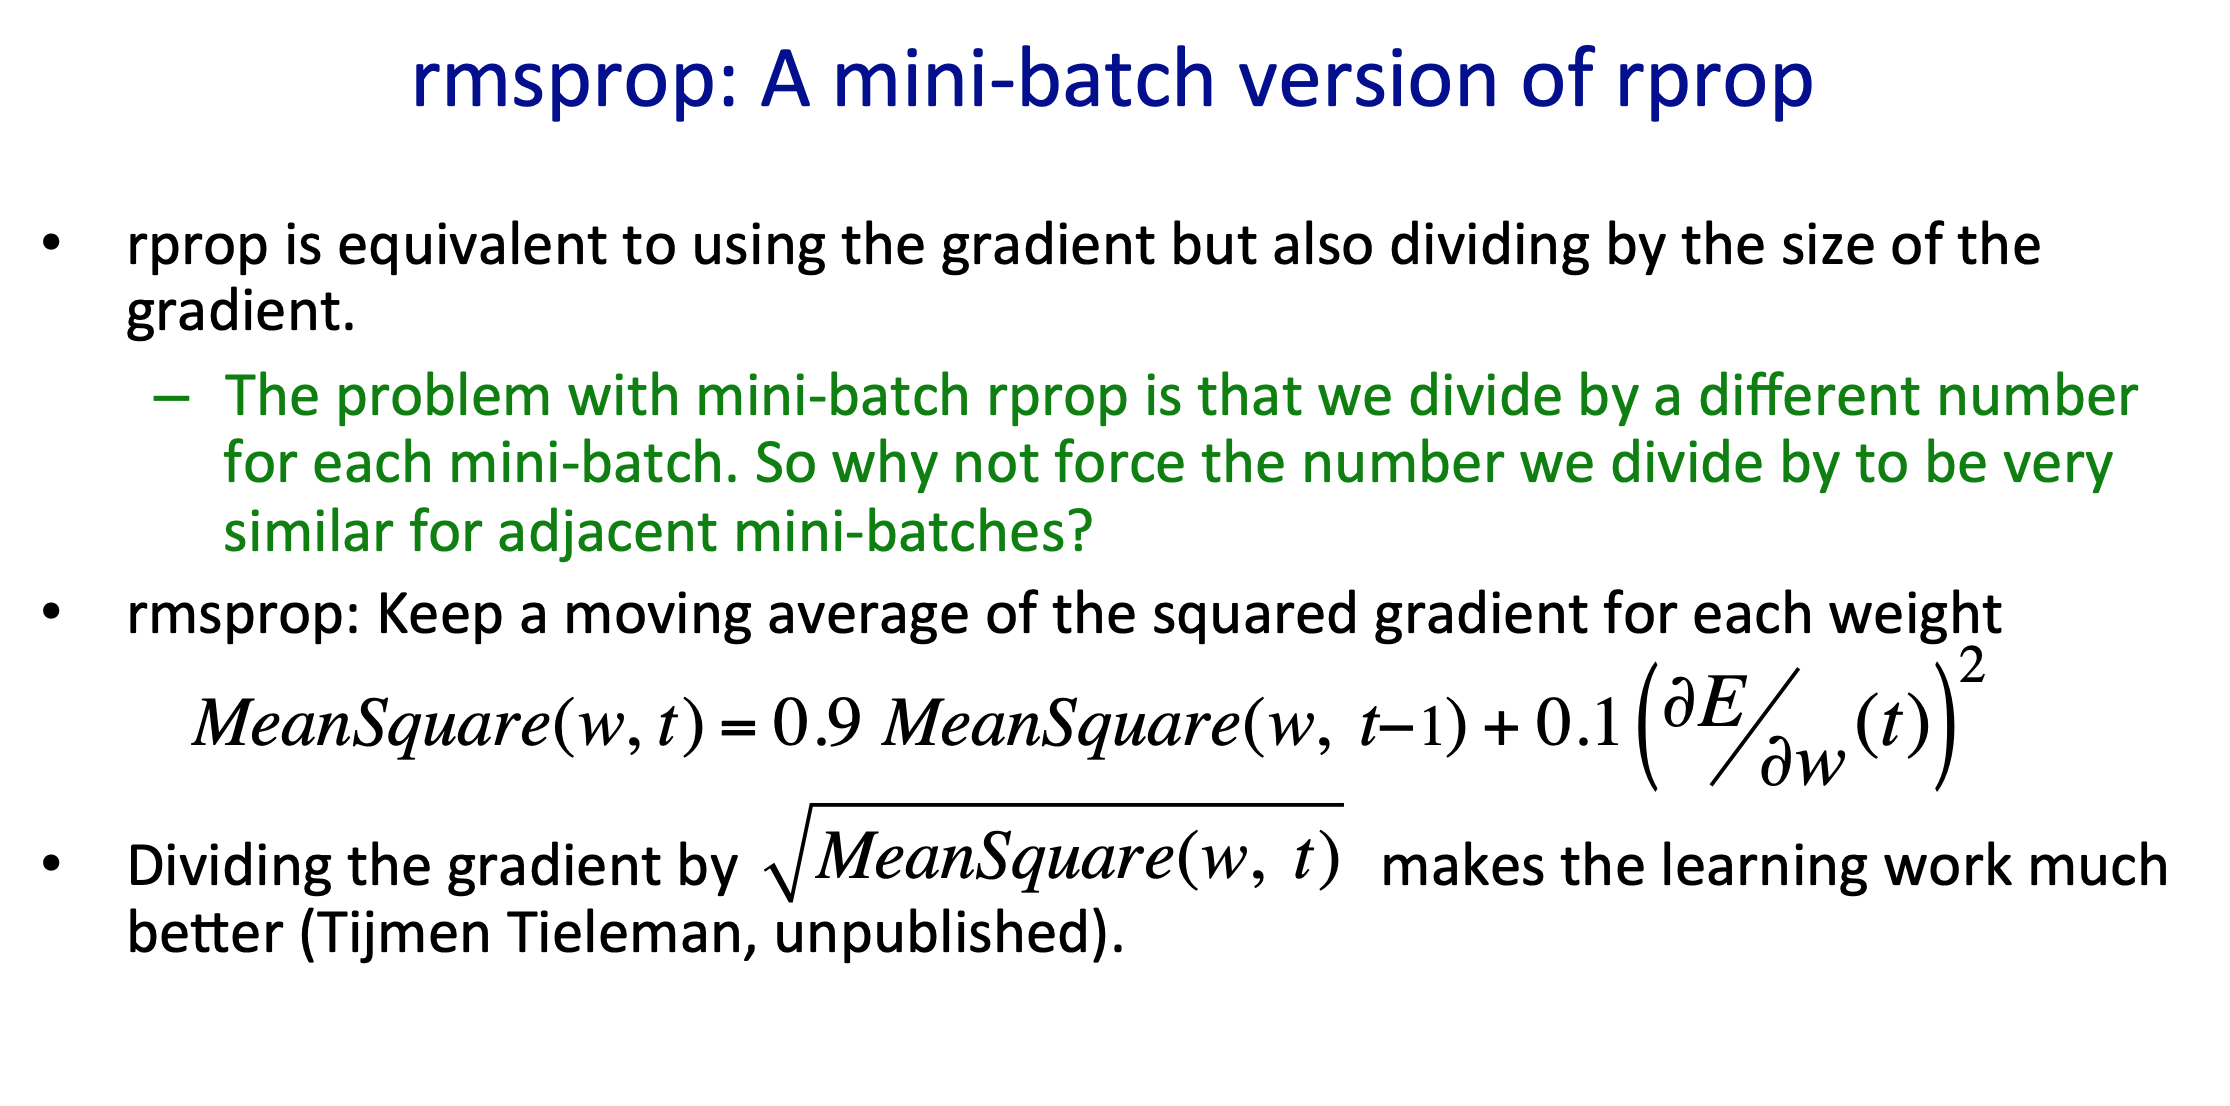
***

AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. <font color=green>RMSProp</font> algorithm fixes this by accumulating only the gradients from the most recent iterations.  

 - It does so by using exponential decay in the first step  
$ s ←$ <font color=red>β</font>$s+$<font color=red>(1-β)</font>$∇_{θ}J(θ)⊗∇_{θ}J(θ) $  
$ θ ← θ−η∇_{θ}J(θ)⊘ \sqrt{s+ε} $  
 - decay rate β is typically set to 0.9.  
 - default value often works well, so you may not need to tune it at all.  
 - rho argument corresponds to β  
 - almost always performs much better than AdaGrad. It was the preferred optimization algorithm of many researchers until <font color=green>Adam optimization</font> came around.




In [250]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### Adam Optimization  (adaptive moment estimation)
***
2014 https://arxiv.org/abs/1412.6980
***  
momentum optimization + RMSProp  
<br>
1. $ m ←$ <font color=red>$β_{1}$</font>$m+$<font color=red>(1-$β_{1}$)</font>$∇_{θ}J(θ) $  
2. $ m ←$ <font color=red>$β_{2}$</font>$m+$<font color=red>(1-$β_{2}$)</font>$∇_{θ}J(θ)⊗∇_{θ}J(θ) $  
3. $\hat{m} ← \frac{m}{{1-β_{1}}^t}$  
4. $\hat{s} ← \frac{s}{{1-β_{1}}^t}$   
5. $ θ ← θ−η\hat{m}⊘ \sqrt{\hat{s}+ε} $  
<br>
 - Are estimations of the mean and (uncentered) variance of the gradients. The mean is often called the first moment while the variance is often called the second moment.  
 - $t$ represents the iteration number (starting at 1)  
 - difference is that step 1 : computes an exponentially decaying average rather than an exponentially decaying sum.  
 - Steps 3 and 4 : somewhat of a technical detail: since m and s are initialized at 0, they will be biased toward 0 at the beginning of training.  
 - momentum decay hyperparameter β1 is typically initialized to 0.9.  
 - scaling decay hyperparameter β2 is often initialized to 0.999.  
 - ε is usually initialized to a tiny number such as $10^{–7}$.  
 (you can change it using <font color=pink>keras.backend.set_epsilon()</font>)  

Adam is an adaptive learning rate algorithm  
 - requires less tuning of the learning rate hyperparameter η  
 - often use the default value η = 0.001  
 



In [251]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Adamax Optimization   
***
 - replaces the $l_{2}$ norm with the $l_{∞}$ norm (a fancy way of saying the max)
 - in step 2, Adam accumulates the squares of the gradients in s.  
 $ m ←$ <font color=red>$β_{2}$</font>$m+$<font color=red>(1-$β_{2}$)</font>$∇_{θ}J(θ)⊗∇_{θ}J(θ) $ ->  <font color=red>$s ← max (β_{2}s,∇θJ(θ))$</font>
 - it drops step 4, and in step 5.  
  scales down the gradient updates by a factor of s, which is just the max of the time-decayed gradients.  

<br>

AdaMax more stable than Adam, but it really depends on the dataset.  
 - in general Adam performs better. So, this is just one more optimizer you can try if you experience problems with Adam
 

<font color=green>Adam</font>

In [252]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

### Nadam Optimization  
***    
http://cs229.stanford.edu/proj2015/054_report.pdf  
***  
 - Adam optimization + Nesterov trick  
 - converge slightly faster than Adam. 
 - Nadam generally outperforms Adam but is sometimes outperformed by RMSProp.  
 ***   
 https://arxiv.org/abs/1705.08292  
 
 - Adaptive optimization methods (including RMSProp, Adam, and Nadam optimization) are often great.  
 - they can lead to solutions that generalize poorly on some datasets.  
 - when you are disappointed by your model’s performance, try using plain <font color=green>Nesterov Accelerated Gradient</font>  instead
 ***

In [253]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

 - first-order partial derivatives (Jacobians)
 - second-order partial derivatives (the Hessians, which are the partial derivatives of the Jacobians)  
  - Unfortunately, these algorithms are very hard to apply to deep neural networks because there are n2 Hessians per output (where n is the number of parameters)  
  - Second-order optimization algorithms often don’t even fit in memory, and even when they do, <font color=green>computing the Hessians is just too slow.</font>  
<br><br>
<font color=green>Optimizer comparison</font>  
 (* is bad, ** is average, and *** is good).

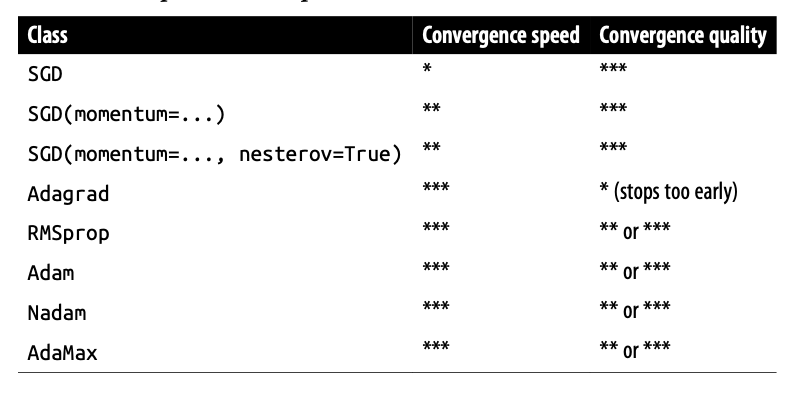  
  

#### Training Sparse Models  
*** 
All the optimization algorithms just presented produce dense models. -> most parameters will be nonzero.  
 - need a blazingly fast model at runtime, or if you need it to take up less memory, you may prefer to end up with a sparse model.  
  1. train the model as usual  
  2. get rid of the tiny weights (set them to zero)  
   (it may degrade the model’s performance.)  
 - better option is to apply strong $l_{1}$ regularization during training.  
  1. it pushes the optimizer to zero out as many weights as it can.  
  (as discussed in <font color=green>“Lasso Regression”</font> on page 137 in <font color=green>Chapter 4</font>).  
 - https://www.tensorflow.org/model_optimization/    
 provides a pruning API capable of iteratively removing connections during training based on their magnitude.

> # Learning Rate Scheduling  
*** 
Finding a good learning rate is very important.  
 - If you set it  <font color=red> much too high</font> , training may diverge (as we discussed in “Gradient Descent” on page 118).   
 - If you set it <font color=orange>too low</font> , training will eventually converge to the optimum, but it will take a very long time.  
 - <font color=purple>slightly too high</font>, it will make progress very quickly at first, but it will end up dancing around the optimum, never really settling down.  
 <br>
 
 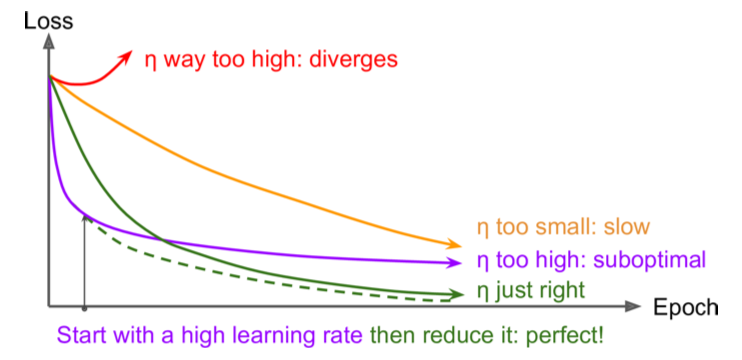  
<br>

you can find a good learning rate by training the model for a few hundred iterations.(<font color=green>Chapter 10</font>)  
 - exponentially increasing the learning rate from a very small value to a very large value.  
 - looking at the learning curve and picking a learning rate slightly lower than the one at which the learning curve starts shooting back up.
<br>

you can do better than a constant learning rate. (<font color=green> __*learning schedules*__</font> ) 
 - if you __*start with a large learning*__ rate and then reduce it once training stops making fast progress, you can reach a good solution faster than with the optimal constant learning rate.  
 - It can also be beneficial to __*start with a low learning rate*__, increase it, then drop it again.

# Power Scheduling  
***  
 iteration number $t: η(t) = η_{0} / (1 + t/s)^{c}$  
  - initial learning rate $η_{0}$  
  - power $c$ (typically set to 1)
  - steps $s$ are hyperparameters.  

learning rate drops at each step.  
 - After $s$ steps, it is down to $η_{0} / 2$  
 - After $s$ more steps, it is down to $η_{0} / 3$  
 - goes down to $η_{0} / 4$, then $η_{0} / 5$, and so on  
 
Keras uses $c=1$ and $s = 1 / decay$ 

In [254]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [255]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [256]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4855 - accuracy: 0.8303 - val_loss: 0.4030 - val_accuracy: 0.8594
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8657 - val_loss: 0.3718 - val_accuracy: 0.8726
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3458 - accuracy: 0.8768 - val_loss: 0.3746 - val_accuracy: 0.8748
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3250 - accuracy: 0.8830 - val_loss: 0.3504 - val_accuracy: 0.8800
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8890 - val_loss: 0.3448 - val_accuracy: 0.8786
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2966 - accuracy: 0.8935 - val_loss: 0.3416 - val_accuracy: 0.8830
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.8975 - val_loss: 0.3360 - val_accuracy:

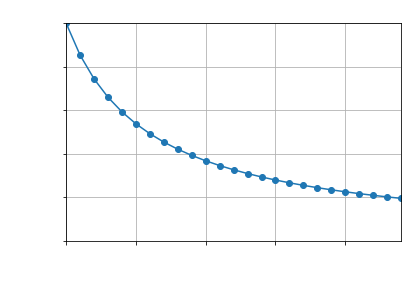

In [257]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch", color='w')
plt.ylabel("Learning Rate", color='w')
plt.yticks(color='w')
plt.xticks(color='w')
plt.title("Power Scheduling", fontsize=14, color='w')
plt.grid(True)
plt.show()

# Exponential scheduling  
***  
$ η(t) = η_{0}0.1^{t/s}$   
 - learning rate will gradually drop by a factor of 10 every $s$ steps.  
 - power scheduling reduces the learning rate more and more slowly, <font color=green> exponential scheduling keeps slashing it by a factor of 10 every s steps.</font>

In [258]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [259]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [260]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [261]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8586 - accuracy: 0.7571 - val_loss: 1.0866 - val_accuracy: 0.7168 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6746 - accuracy: 0.7991 - val_loss: 0.5515 - val_accuracy: 0.8150 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5870 - accuracy: 0.8184 - val_loss: 0.6502 - val_accuracy: 0.8120 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5221 - accuracy: 0.8367 - val_loss: 0.5675 - val_accuracy: 0.8334 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4911 - accuracy: 0.8475 - val_loss: 0.4625 - val_accuracy: 0.8596 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4398 - accuracy: 0.8612 - val_loss: 0.4650 - val_accuracy: 0.8634 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 

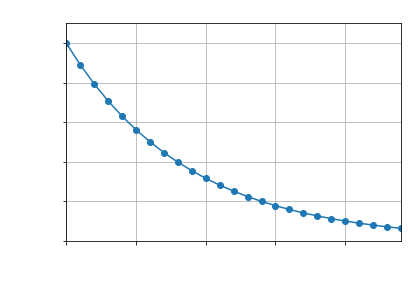

In [262]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch", color='w')
plt.ylabel("Learning Rate", color='w')
plt.yticks(color='w')
plt.xticks(color='w')
plt.title("Exponential Scheduling", fontsize=14, color='w')
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [263]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [264]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8085 - accuracy: 0.7643 - val_loss: 0.7219 - val_accuracy: 0.7738 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6696 - accuracy: 0.7978 - val_loss: 0.7522 - val_accuracy: 0.8100 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5962 - accuracy: 0.8162 - val_loss: 0.5846 - val_accuracy: 0.8208 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5226 - accuracy: 0.8360 - val_loss: 0.4700 - val_accuracy: 0.8442 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4862 - accuracy: 0.8459 - val_loss: 0.4742 - val_accuracy: 0.8568 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4370 - accuracy: 0.8606 - val_loss: 0.4637 - val_accuracy: 0.8668 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

In [265]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

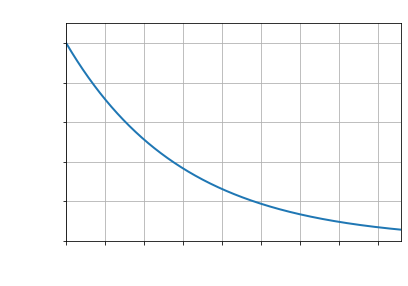

In [266]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch",color='w')
plt.ylabel("Learning Rate",color='w')
plt.yticks(color='w')
plt.xticks(color='w')
plt.title("Exponential Scheduling (per batch)", fontsize=14,color='w')
plt.grid(True)
plt.show()

# Piecewise Constant Scheduling  
*** 
 - Use a constant learning rate for a number of epochs.($η_{0} = 0.1$ for 5 epochs)  
 - then a smaller learning rate for another number of epochs ( $η_{1} = 0.001$ for 50 epochs)  
 -  requires fiddling around to figure out the right sequence of learning rates and how long to use each of them.

In [267]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [268]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [269]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8462 - accuracy: 0.7565 - val_loss: 1.0619 - val_accuracy: 0.7188 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8056 - accuracy: 0.7664 - val_loss: 0.7513 - val_accuracy: 0.8008 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 11s 7ms/step - loss: 1.0111 - accuracy: 0.7234 - val_loss: 0.9518 - val_accuracy: 0.6282 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9664 - accuracy: 0.7347 - val_loss: 0.9294 - val_accuracy: 0.7018 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.9291 - accuracy: 0.7467 - val_loss: 1.1254 - val_accuracy: 0.6724 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6297 - accuracy: 0.8058 - val_loss: 0.6112 - val_accuracy: 0.8296 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

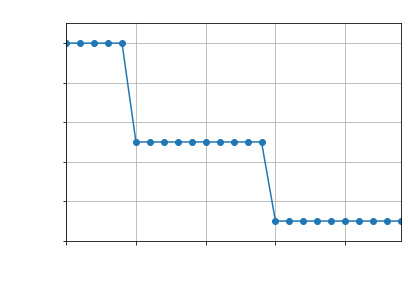

In [270]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch",color='w')
plt.ylabel("Learning Rate",color='w')
plt.title("Piecewise Constant Scheduling", fontsize=14,color='w')
plt.yticks(color='w')
plt.xticks(color='w')
plt.grid(True)
plt.show()

# Performance Scheduling  
***  
 - Measure the validation error every N steps <font color=green>(just like for early stopping)  </font>
 - reduce the learning rate by a factor of λ when the error stops dropping.  
 -  use the <font color=pink>ReduceLROnPlateau callback</font>.

In [271]:
tf.random.set_seed(42)
np.random.seed(42)

In [272]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5925 - accuracy: 0.8074 - val_loss: 0.5282 - val_accuracy: 0.8466 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4914 - accuracy: 0.8418 - val_loss: 0.6569 - val_accuracy: 0.8186 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5135 - accuracy: 0.8419 - val_loss: 0.4895 - val_accuracy: 0.8514 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5122 - accuracy: 0.8467 - val_loss: 0.4845 - val_accuracy: 0.8440 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5168 - accuracy: 0.8493 - val_loss: 0.5630 - val_accuracy: 0.8344 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5005 - accuracy: 0.8548 - val_loss: 0.6042 - val_accuracy: 0.8498 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

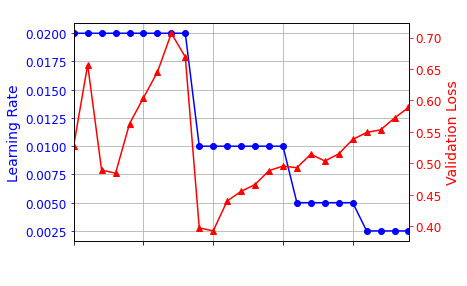

In [273]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch", color='w')
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.xticks(color='w')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14, color='w')
plt.show()

# tf.keras schedulers  
***  
 - tf.keras offers an alternative way to implement learning rate scheduling. 
  - define the learning rate using one of the schedules available in <font color=pink>keras.optimizers.schedules</font>. 
  -  then pass this learning rate to any optimizer.  
  - This approach updates the learning rate at each step rather than at each epoch. 

In [274]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4894 - accuracy: 0.8274 - val_loss: 0.4092 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3820 - accuracy: 0.8650 - val_loss: 0.3738 - val_accuracy: 0.8692
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3487 - accuracy: 0.8766 - val_loss: 0.3733 - val_accuracy: 0.8686
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3264 - accuracy: 0.8835 - val_loss: 0.3493 - val_accuracy: 0.8804
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8897 - val_loss: 0.3429 - val_accuracy: 0.8796
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.8950 - val_loss: 0.3415 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2854 - accuracy: 0.8988 - val_loss: 0.3354 - val_accuracy:

In [275]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

# 1cycle scheduling  
***  
2018 https://arxiv.org/abs/1803.09820  
*** 
Contrary to the other approaches.  
 - starts by increasing the initial learning rate $η_{0}$  
 - growing linearly up to $η_{1}$ halfway through training.   
 - Then it decreases the learning rate linearly down to $η_{0}$ again during the second half of training.  
 - finishing the last few epochs by dropping the rate down by several orders of magnitude (still linearly)  
 - maximum learning rate $η_{1}$ is chosen using the same approach we used to find the optimal learning rate, and the initial learning rate $η_{0}$ is chosen to be roughly 10 times lower.  

Using a momentum  
 - start with a high momentum first <font color=green>(e.g., 0.95)</font>  
 - hen drop it down to a lower momentum during the first half of training <font color=green>(e.g., down to 0.85, linearly)</font>  
 - then bring it back up to the maximum value <font color=green>(e.g., 0.95)</font> during the second half of training.  
 - finishing the last few epochs with that<font color=green> maximum value</font>.  

In [276]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate",color='w')
    plt.ylabel("Loss",color='w')
    plt.yticks(color='w')
    plt.xticks(color='w')

In [277]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [278]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_513 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_514 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_515 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


430/430 [==============================] - 2s 4ms/step - loss: 498356515788833617894667083317248.0000 - accuracy: 0.3879


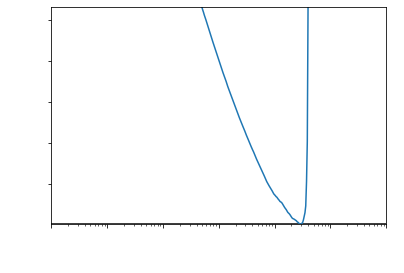

In [279]:
batch_size = 128
# batch_size = 1 
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [280]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [281]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4581 - accuracy: 0.8397 - val_loss: 0.4274 - val_accuracy: 0.8520
Epoch 3/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4121 - accuracy: 0.8546 - val_loss: 0.4115 - val_accuracy: 0.8582
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3837 - accuracy: 0.8643 - val_loss: 0.3869 - val_accuracy: 0.8682
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3640 - accuracy: 0.8718 - val_loss: 0.3763 - val_accuracy: 0.8686
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3456 - accuracy: 0.8771 - val_loss: 0.3743 - val_accuracy: 0.8710
Epoch 7/25
430/430 [==============================] - 3s 8ms/step - loss: 0.3330 - accuracy: 0.8810 - val_loss: 0.3631 - val_accuracy: 0.8712
Epoch 

# compared the performance of some of the most popular learning schedules   
***  
<font color=green>performance scheduling</font> and <font color=green>exponential scheduling </font>performed well.  
 - favored exponential scheduling because it was easy to tune and it converged slightly faster to the optimal solution.  
 - also mentioned that it was easier to implement than performance scheduling, but <font color=green>in Keras both options are easy</font>.   
 - 1cycle approach seems to perform even better.  
 - Implementing power scheduling in Keras is the easiest option.  
 <font color=pink>optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)</font>. 
  decay is the inverse of s (the number of steps it takes to divide the learning rate
by one more unit), and Keras assumes that c is equal to 1.  
 - Exponential scheduling and piecewise scheduling are quite simple too.  
 <font color=pink>def exponential_decay_fn(epoch): return 0.01 * 0.1**(epoch / 20)</font>  
 If you do not want to hardcode $η_{0} and s$  
 <font color=pink>def exponential_decay(lr0, s):
def exponential_decay_fn(epoch):  
    return lr0 * 0.1**(epoch / s)  
    return exponential_decay_fn  
    exponential_decay_fn = exponential_decay(lr0=0.01, s=20)</font>  
 - create a LearningRateScheduler callback  
 will update the optimizer’s learning_rate attribute at the beginning of each epoch.  
 
 <font color=pink>lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, [...], callbacks=[lr_scheduler])</font>  
 - When you save a model, the optimizer and its learning rate get saved along with it. the epoch does not get saved, and it gets reset to 0 every time you call the fit()

> # Avoiding Overfitting Through Regularization  
***  
 - best regularization techniques in Chapter 10: early stopping.  
 - even though Batch Normalization was designed to solve the unstable gradients problems  
 - <font color=green>$l_{1}$ and $l_{2}$ regularization, dropout, and max-norm regularization.</font>

 # $l_{1}$ and $l_{2}$ regularization  
 *** 
 - you can use $l_{2}$ regularization to constrain a neural network’s connection weights, and/or $l_1$ regularization if you want a sparse model (with many weights equal to 0)  
 - here is how to apply $l_{2}$ regularization to a Keras layer’s connection weights, using a regularization factor of 0.01:

In [282]:
# l2 regularization to a Keras layer’s connection weights,
# using a regularization factor of 0.01:  
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [283]:
# Since you will typically want to apply the same regularizer to all layers
# as well as using the same activation function and the same initialization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 15s 9ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


1. you can try refactoring your code to use loops.  
2. Python’s <font color=pink>functools.partial()</font> function

In [284]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
                # keras.layers.Dense(300, activation="elu",
                #                        kernel_initializer="he_normal",
                #                        kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 12s 7ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


# Dropout  
***  
2012 https://arxiv.org/abs/1207.0580  
2014 http://jmlr.org/papers/v15/srivastava14a.html  
***  
 - 1–2% accuracy boost simply by adding dropout.  
It is a fairly simple algorithm.  
 - at every training step, every neuron (including the input neurons, but always excluding the output neurons.  
 - probability p of being temporarily “dropped out,” meaning it will be entirely ignored during this training step.  
 - may be active during the next step. 
 - After training, neurons don’t get dropped anymore.

hyperparameter p is called the <font color=green>dropout rate</font>  
 - typically set between <font color=green>10% and 50%</font>  
 - closer to <font color=green>20– 30%</font> in recurrent neural nets <font color=green>(see Chapter 15)</font> 
 - closer to <font color=green>40–50%</font> in convolutional neural networks <font color=green>(see Chapter 14)</font>  
 
 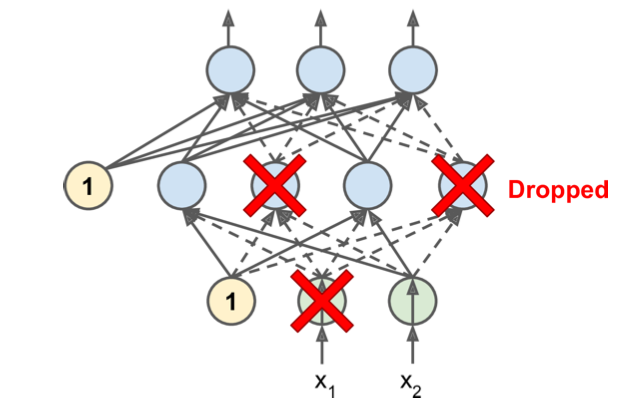  
 
 At each training iteration a random subset of all neurons in one or more layers—except the output layer—are “dropped out”.  
 <br>
 
 - with dropout cannot co-adapt with their neighboring neurons; they have to be as useful as possible on their own.  
 - cannot rely excessively on just a few input neurons.  
 - They end up being less sensitive to slight changes in the input.
  
there are a total of 2N possible networks  
<br>   
***
 - In practice, you can usually apply dropout only to the neurons in the top one to three layers (excluding the output layer).  
 - Since dropout is only active during training, comparing the training loss and the validation loss can be misleading.  
 - may be overfitting the training set and yet have similar training and validation losses.
 - make sure to evaluate the training loss without dropout <font color=green>(e.g., after training)</font>  
  - If you observe that the model is overfitting, you can increase the dropout rate.
  - you should try decreasing the dropout rate if the model underfits the training set. 
  - can also help to increase the dropout rate for large layers, and reduce it for small ones.  
  - only use dropout after the last hidden layer, so you may want to try this if full dropout is too strong.  
 - Dropout does tend to significantly slow down convergence. 
 - results in a much better model when tuned properly.

In [285]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4208 - accuracy: 0.8445 - val_loss: 0.3397 - val_accuracy: 0.8716


# Alpha Dropout  
***  
If you want to regularize a self-normalizing network based on the SELU activation function.  
 - that preserves the mean and standard deviation of its inputs.  
 - regular dropout would break self-normalization.

In [286]:
tf.random.set_seed(42)
np.random.seed(42)

In [287]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6654 - accuracy: 0.7599 - val_loss: 0.5935 - val_accuracy: 0.8420
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5607 - accuracy: 0.7930 - val_loss: 0.5583 - val_accuracy: 0.8396
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5283 - accuracy: 0.8057 - val_loss: 0.4828 - val_accuracy: 0.8592
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5073 - accuracy: 0.8115 - val_loss: 0.4578 - val_accuracy: 0.8608
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4923 - accuracy: 0.8174 - val_loss: 0.4579 - val_accuracy: 0.8586
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4874 - accuracy: 0.8200 - val_loss: 0.4700 - val_accuracy: 0.8624
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4715 - accuracy: 0.8246 - val_loss: 0.4612 - val_accura

In [288]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.8664


[0.4453473687171936, 0.8664000034332275]

In [289]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3312 - accuracy: 0.8892


[0.3312146067619324, 0.88919997215271]

In [290]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 6s 4ms/step - loss: 0.4167 - accuracy: 0.8450


# Monte Carlo (MC) Dropout  
***  
2016 https://arxiv.org/abs/1506.02142  
***  
 - First, the paper established a profound connection between dropout networks (i.e., neural networks containing a Dropout layer before every weight layer) and approximate Bayesian inference.  
 - Second, the authors introduced a powerful technique called MC Dropout, which can boost the performance of any trained dropout model without having to retrain it or even modify it at all.  
 
<br>
boosting the dropout model we trained earlier without retraining it.  
 
 - We just make 100 predictions over the test set.   
 - setting <font color-=pink>training=True</font> to ensure that the Dropout layer is active.  
 - and stack the predictions.  
 - 10,000 instances in the test set and 10 classes, this is a matrix of shape [10000, 10]  
 - We stack 100 such matrices, so y_probas is an array of shape [100, 10000, 10]  

<br>
The number of Monte Carlo samples you use (100 in this example) is a hyperparameter you can tweak.  
 
 - higher it is, the more accurate the predictions and their uncertainty estimates will be.  
 - if you double it, inference time will also be doubled.  
 - find the right trade-off between latency and accuracy!

In [291]:
tf.random.set_seed(42)
np.random.seed(42)

In [292]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [293]:
np.round(model.predict(X_test_scaled[:1]), 2)
# no dropout
# model seems almost certain that this image belongs to class 9 (ankle boot)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [294]:
np.round(y_probas[:, :1], 2)
# predictions made when dropout is activated.
# classes 5 (sandal) and 7 (sneaker), which makes sense given they’re all footwear

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.18, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.06]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.  , 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.12, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.31, 0.  , 0.16, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.43, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.12, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.42, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.65, 0.  , 0.04, 0.  , 0.31]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.05, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.05, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.  , 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.04, 0.  , 0.12]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.01, 0.  , 0

In [295]:
np.round(y_proba[:1], 2) # average over the first dimension

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.1 , 0.  , 0.7 ]],
      dtype=float32)

In [296]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)
# If you were building a risk-sensitive system (e.g., a medical or financial system), 
# you should probably treat such an uncertain prediction with extreme caution

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.17, 0.  , 0.29]],
      dtype=float32)

In [297]:
y_pred = np.argmax(y_proba, axis=1)

In [298]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8707

 - If your model contains other layers that behave in a special way during training (such as BatchNormalization layers)  
 - you should replace the <font color=pink>Dropout</font> layers with the following <font color=pink>MCDropout</font> class.

In [299]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [300]:
tf.random.set_seed(42)
np.random.seed(42)

In [301]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [302]:
mc_model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_526 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_527 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_528 (Dense)            (None, 10)              

In [303]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [304]:
mc_model.set_weights(model.get_weights())

#### Now we can use the model with MC Dropout:

In [305]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.16, 0.  , 0.64]],
      dtype=float32)

> # Max-Norm Regularization  
***  
 - Max-norm regularization does not add a regularization loss term to the overall loss function. 
 -  implemented by computing $∥w∥_2$ after each training step and rescaling w if needed ($w ← w r/‖ w ‖_{2}$)  
  - Reducing r increases the amount of regularization and helps reduce overfitting.  
  - can also help alleviate the unstable gradients problems (if you are not using Batch Normalization).  

<br>
To implement max-norm regularization in Keras.  
 
 -  <font color=pink>kernel_constraint</font>

In [307]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [308]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4731 - accuracy: 0.8338 - val_loss: 0.3758 - val_accuracy: 0.8618
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3534 - accuracy: 0.8719 - val_loss: 0.3825 - val_accuracy: 0.8628


# Summary and Practical Guidelines  
***  

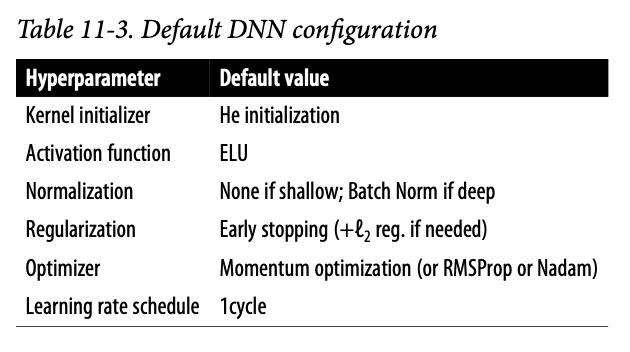

<br> 
 



If the network is a simple stack of dense layers, then it can self-normalize.   
 
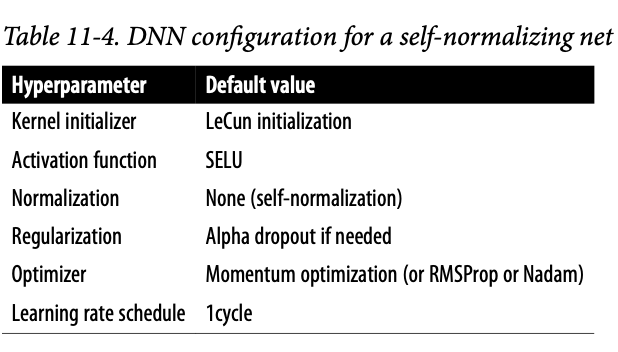  

 - Don’t forget to normalize the input features!  
 - use pretraining on an auxiliary task if you have a lot of labeled data for a similar task.  
 -  or use unsupervised pretraining if you have a lot of unlabeled data, or use pretraining on an auxiliary task if you have a lot of labeled data for a similar task.  
 

Previous guidelines should cover most cases, here are some exceptions:  
 - If you need a sparse model, you can use $l_1$ regularization (and optionally zero out the tiny weights after training).  
  - If you need an even sparser model, can use the TensorFlow Model Optimization Toolkit.(This will break self-normalization, you should use the default configuration in this case)  
 - If you need a low-latency model (one that performs lightning-fast predictions), you may need to use fewer layers.  
  - fold the Batch Normalization layers into the previous layers, and possibly use a faster activation function such as leaky ReLU or just ReLU.  
  - Having a sparse model will also help.  
  -  you may want to reduce the float precision from 32 bits to 16 or even 8 bits.  
  - check out TF- MOT.  
 - If you are building a risk-sensitive application.  
  -  you can use MC Dropout to boost performance and get more reliable probability estimates.  
  